In [201]:
import glob
import datetime

import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft, fft2, ifft2, fftshift

from gpclock import read_header, get_time_delay

In [202]:
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift &lt; 0 means that y starts 'shift' time steps before x # shift &gt; 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [2]:
earth_list = sorted(glob.glob('./final_test/*earth.csv'))

In [3]:
prf_earth = np.genfromtxt(earth_list[0], skip_header=14).T

In [204]:
original = prf_earth[1]
shift = np.roll(prf_earth[1], -1150)

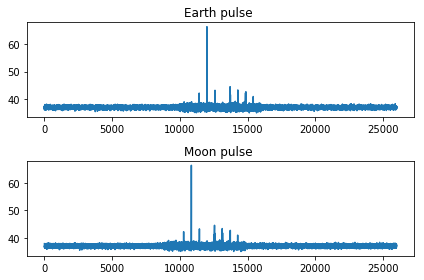

In [205]:
plt.close()
plt.subplot(2, 1, 1)
plt.plot(original)
plt.title("Earth pulse ")

# !!! Две строки, три столбца.
# !!! Текущая ячейка - 2
plt.subplot(2, 1, 2)
plt.plot(shift)
plt.title("Moon pulse ")

plt.tight_layout()

plt.show()

0.0


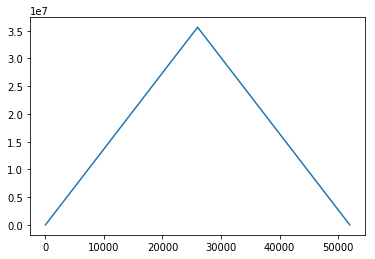

In [206]:
cf = np.correlate(original, shift, 'full')
print((((len(cf)-1)/2)-np.argmax(cf)))
plt.close()
plt.plot(cf)
plt.show()

0.0

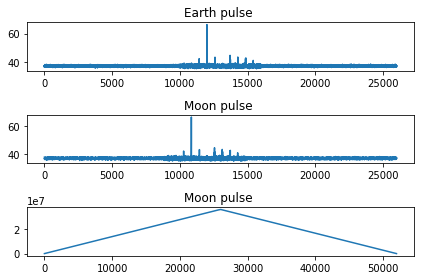

In [207]:
get_time_delay(0, 0, original, shift)

In [208]:
compute_shift(original, shift)

-1150

-11250